In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor


In [3]:
df=pd.read_excel('/content/drive/MyDrive/employee_burnout_analysis-AI 2.xlsx')

In [4]:
df.head(15)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,Female,Service,No,3,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,Female,Service,Yes,2,4.0,4.4,0.33
8,fffe32003200300034003700,2008-12-27,Female,Service,No,3,6.0,NaN,0.56
9,fffe31003600320030003200,2008-03-09,Female,Product,No,3,6.0,NaN,0.67


In [5]:
df.tail(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22740,fffe33003300380031003100,2008-09-05,Female,Product,No,3,6.0,7.3,0.55
22741,fffe31003600350034003800,2008-01-07,Male,Product,No,2,5.0,6.0,NaN
22742,fffe33003200310039003000,2008-07-28,Male,Product,No,3,5.0,8.1,0.69
22743,fffe3300390030003600,2008-12-15,Female,Product,Yes,1,3.0,6.0,0.48
22744,fffe32003500370033003200,2008-05-27,Male,Product,No,3,7.0,6.2,0.54
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [6]:
df.isna().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [7]:
df.shape

(22750, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


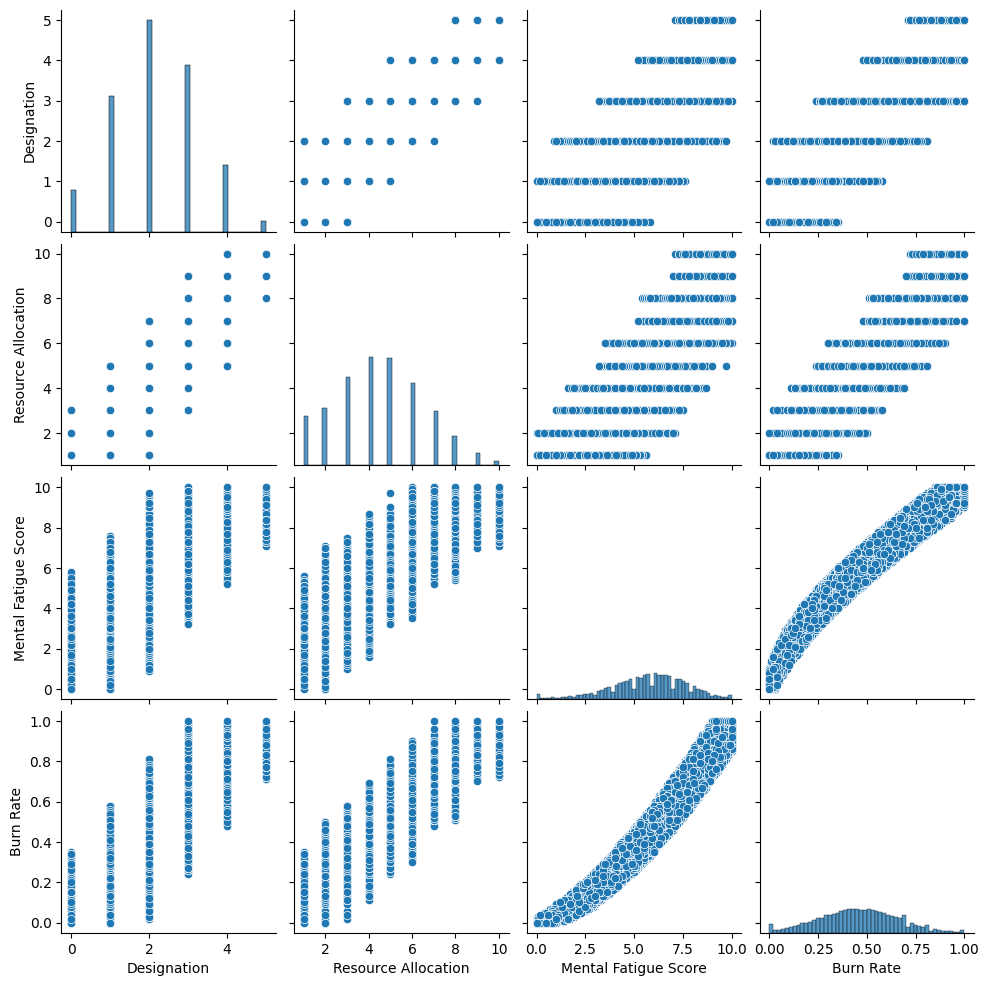

In [9]:
sns.pairplot(df)
plt.show()

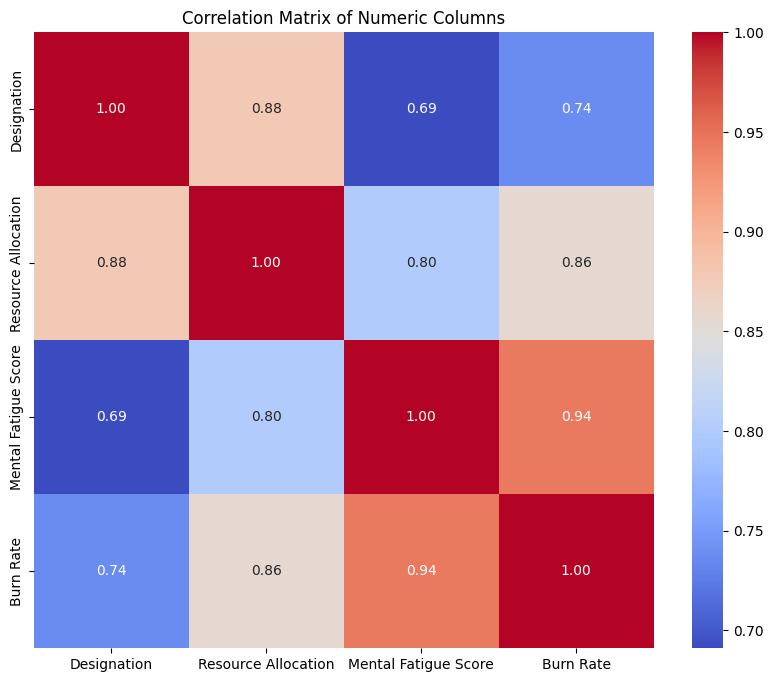

In [10]:
# 1) General correlation between all numeric columns
# Exclude non-numeric columns like 'Employee ID' and 'Date of Joining'
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [11]:
# 2) Correlation with null values
null_corr = df.isnull().mean()
print("Correlation of Columns with Null Values:\n", null_corr)

Correlation of Columns with Null Values:
 Employee ID             0.000000
Date of Joining         0.000000
Gender                  0.000000
Company Type            0.000000
WFH Setup Available     0.000000
Designation             0.000000
Resource Allocation     0.060703
Mental Fatigue Score    0.093055
Burn Rate               0.049407
dtype: float64


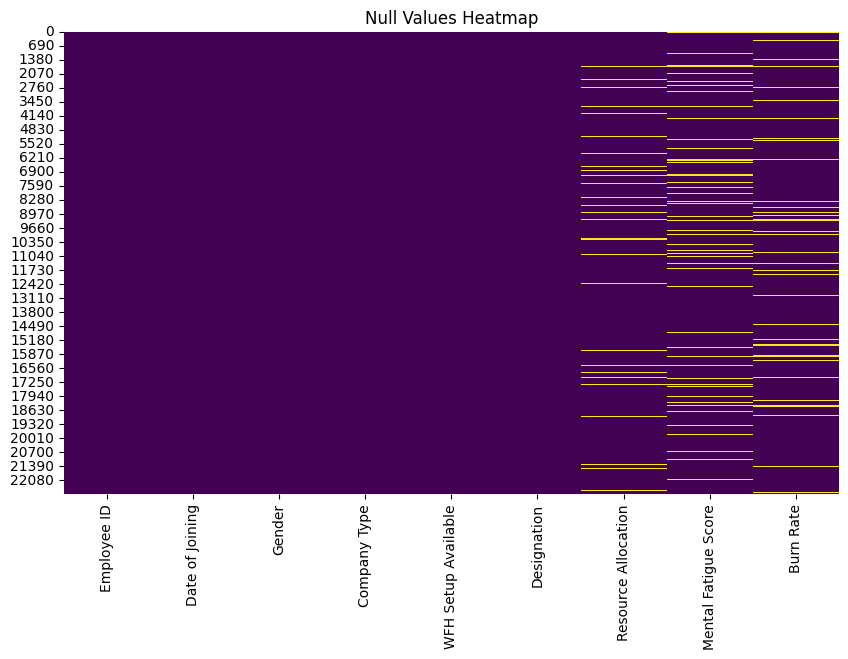

In [12]:
# 3) Null values visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values Heatmap')
plt.show()

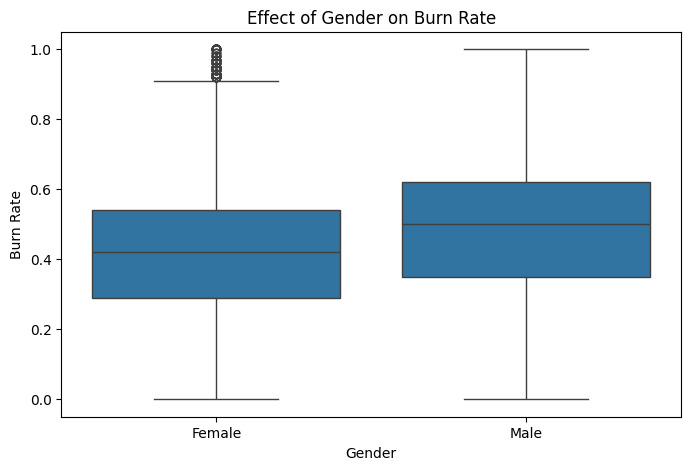

In [13]:
# 4) Plots for the effects of burnout by categorical variables

# Gender wise Burn Rate
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Burn Rate', data=df)
plt.title('Effect of Gender on Burn Rate')
plt.show()

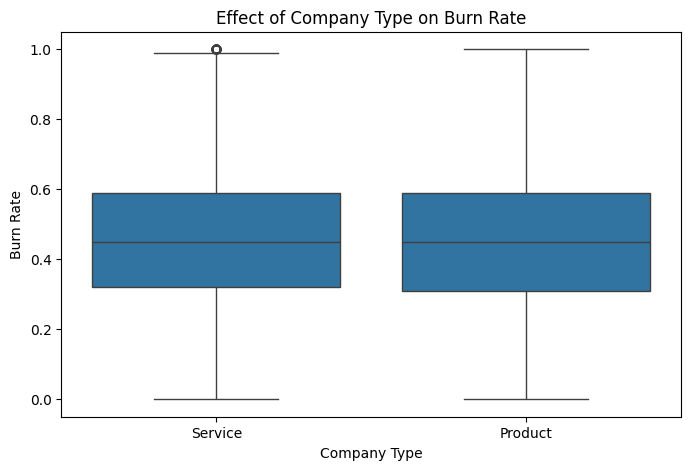

In [14]:
# Company Type wise Burn Rate
plt.figure(figsize=(8, 5))
sns.boxplot(x='Company Type', y='Burn Rate', data=df)
plt.title('Effect of Company Type on Burn Rate')
plt.show()

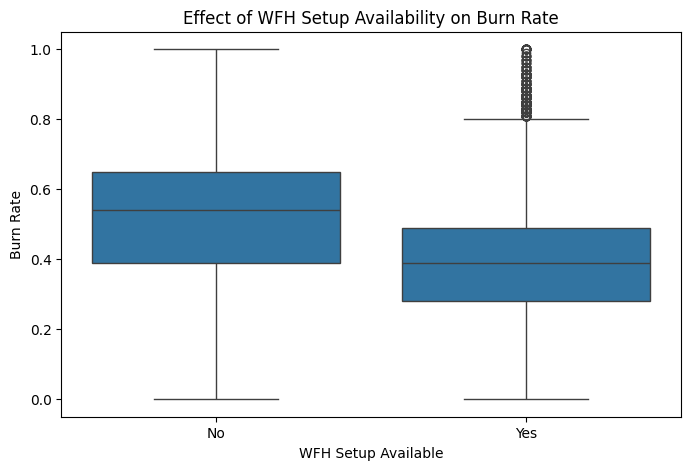

In [15]:
# WFH Setup Availability wise Burn Rate
plt.figure(figsize=(8, 5))
sns.boxplot(x='WFH Setup Available', y='Burn Rate', data=df)
plt.title('Effect of WFH Setup Availability on Burn Rate')
plt.show()

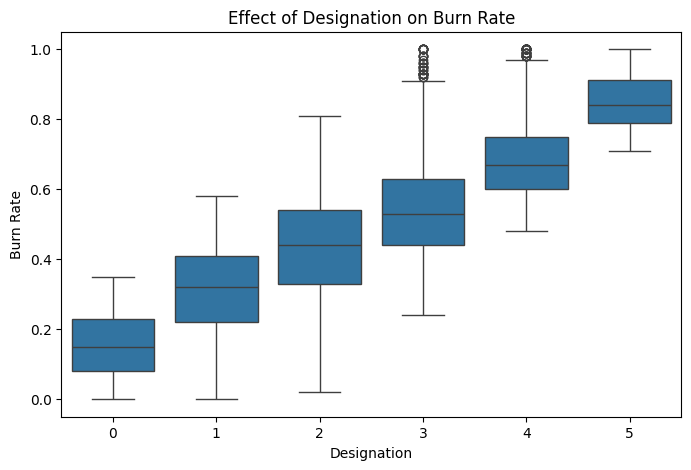

In [16]:
# Designation wise Burn Rate
plt.figure(figsize=(8, 5))
sns.boxplot(x='Designation', y='Burn Rate', data=df)
plt.title('Effect of Designation on Burn Rate')
plt.xticks(rotation=0)
plt.show()

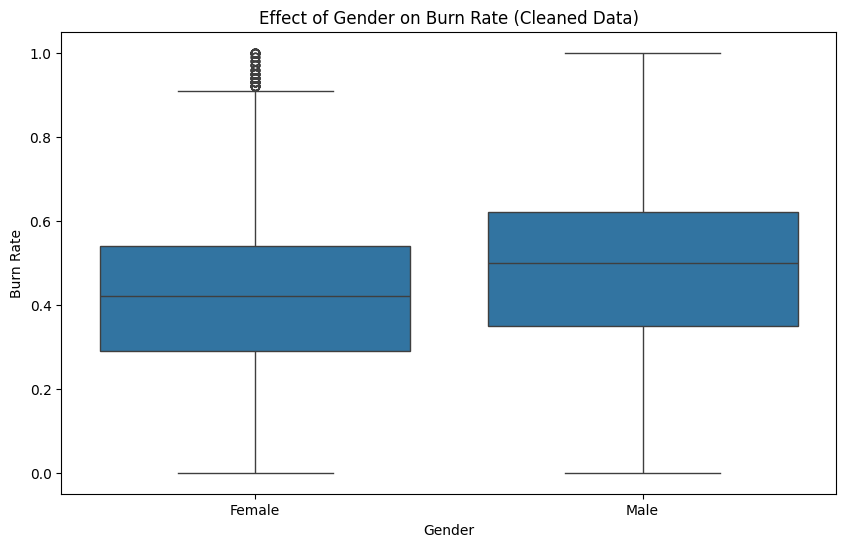

In [17]:
# 5) Dropping rows with NaN values and showing the graph
df_cleaned = df.dropna()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Burn Rate', data=df_cleaned)
plt.title('Effect of Gender on Burn Rate (Cleaned Data)')
plt.show()

In [18]:
df.shape

(22750, 9)

In [19]:
# Drop rows with any NaN values
df_cleaned = df.dropna()

In [36]:
df_cleaned.shape

(18590, 9)

In [21]:
# Split features and target
X = df_cleaned.drop(columns=["Burn Rate", "Employee ID", "Date of Joining"])  # Drop irrelevant columns
y = df_cleaned["Burn Rate"]

In [22]:
# Handle categorical variables using OneHotEncoder
categorical_columns = ["Gender", "Company Type", "WFH Setup Available"]
numerical_columns = [col for col in X.columns if col not in categorical_columns]


In [23]:
# Define a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_columns),  # Leave numerical columns as they are
        ("cat", OneHotEncoder(drop="first"), categorical_columns),  # One-hot encode categorical columns
    ]
)

In [24]:
df.dtypes

,0
Employee ID,object
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


In [25]:
# Create a pipeline to combine preprocessing and polynomial features
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
])

In [26]:
# Create a pipeline for preprocessing
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Apply preprocessing and polynomial features
X_train_poly = poly_features.fit_transform(preprocessor.fit_transform(X_train))
X_test_poly = poly_features.transform(preprocessor.transform(X_test))

In [29]:
# Train XGBoost Regressor trial 1,
xgb_model = XGBRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42
)


In [30]:
xgb_model.fit(X_train_poly, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_poly)

In [31]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 0.04285057346387143
Mean Squared Error: 0.0027818349307350623
Root Mean Squared Error: 0.05274310315799652
R2 Score: 0.9275654106797715


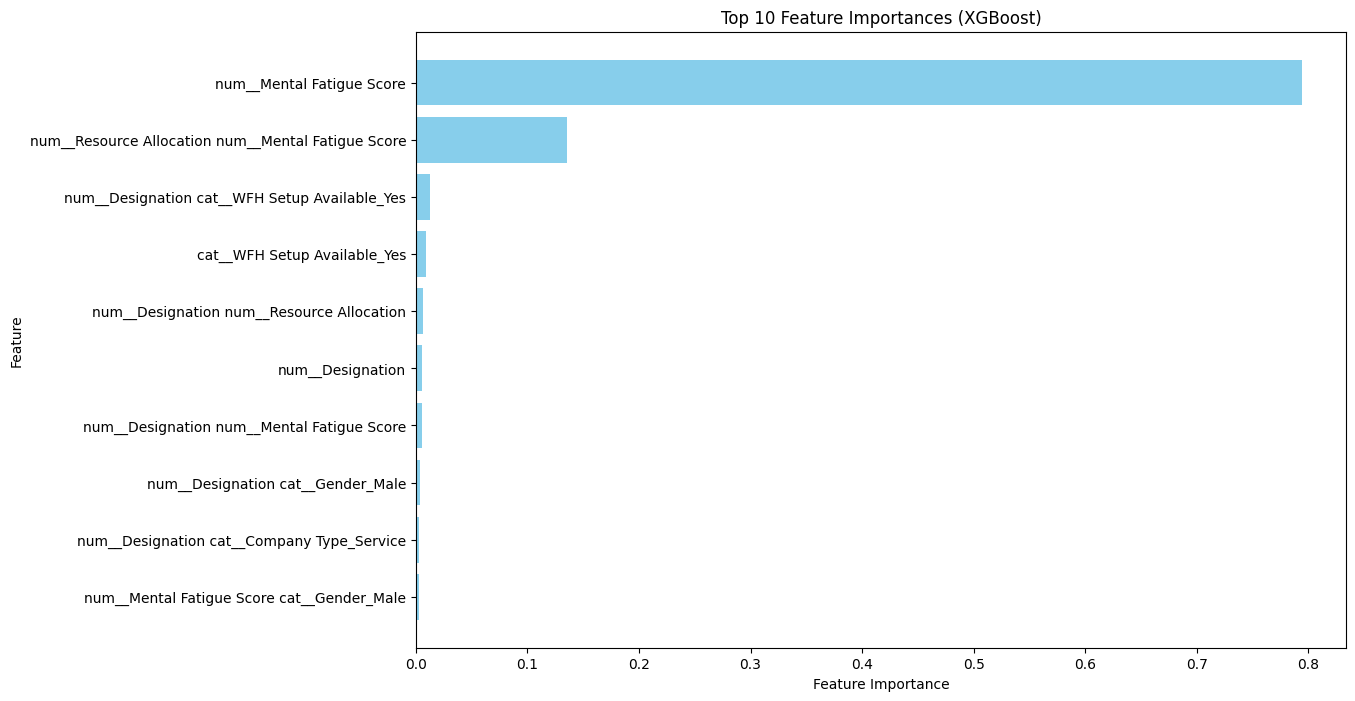

In [32]:
# Feature Importance Visualization (Optional)
feature_importances = xgb_model.feature_importances_
feature_names = poly_features.get_feature_names_out(preprocessor.get_feature_names_out())

sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.barh(
    np.array(feature_names)[sorted_indices][:10],
    feature_importances[sorted_indices][:10],
    color="skyblue",
)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances (XGBoost)")
plt.gca().invert_yaxis()
plt.show()

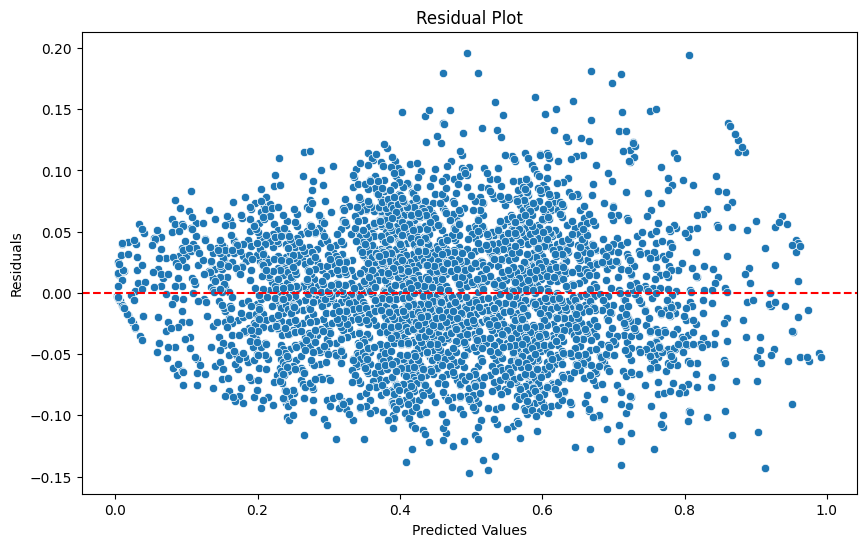

In [33]:
# Residual Plot (Plot residuals vs predicted values)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

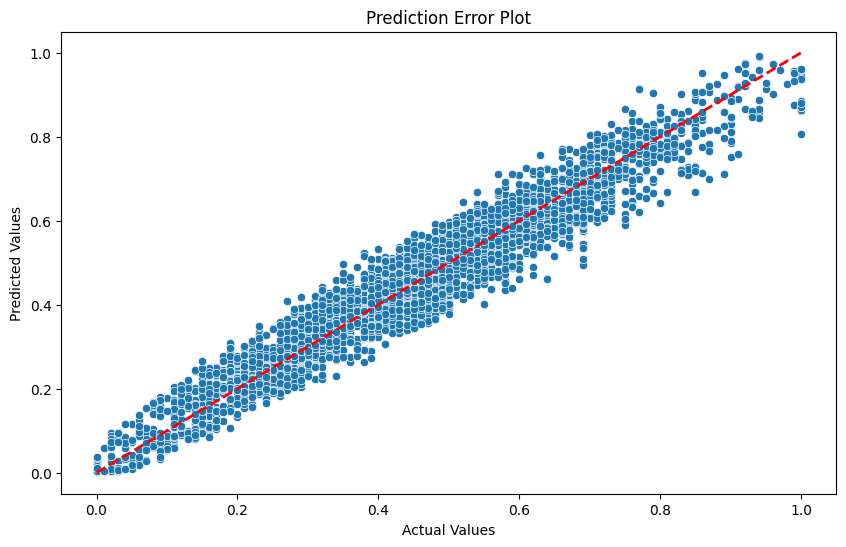

In [34]:
# Prediction Error Plot (Actual vs Predicted)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Prediction Error Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

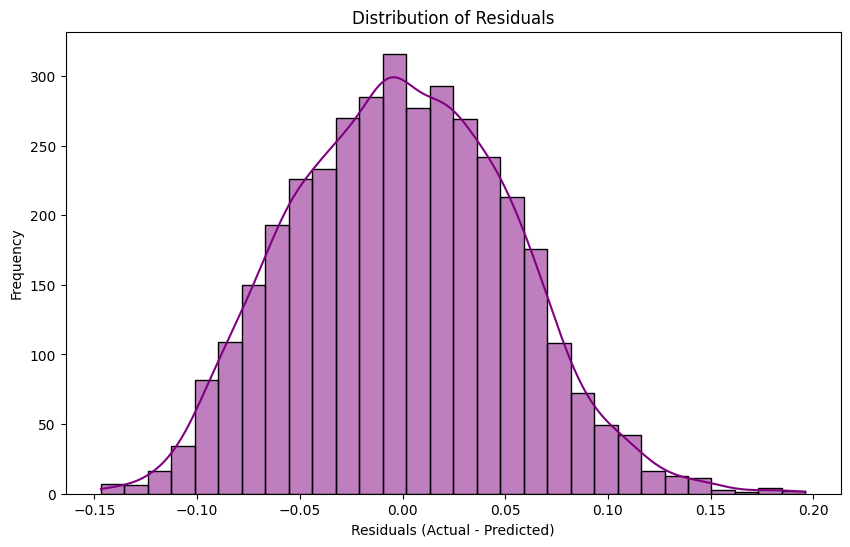

In [35]:
# Histogram of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()